In [ ]:
# Author: Pierre Jeanne
# Date Created:  9 June 2021

# Drug Classification
## This database contains information about certain drug types.

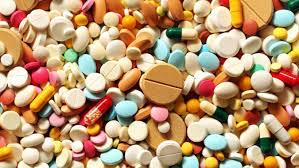

[1: Exploratory Data Analysis](#1)
- [1.1: Load the data](#1.1)
- [1.2: Basic info on data](#1.2)
- [1.3: Stat numerical data](#1.3)
- [1.4: Stat categorical data](#1.4)

[2: Relation between drug type and other variables](#2)
- [2.1: Age vs Sodium to Potassium Ratio](#2.1)
- [2.2: Drug type vs Age and other variables](#2.2)
- [2.3: Summary](#2.3)

[3: Classification](#3)
- [3.1: get dummies](#3.1)
- [3.2: Splitting Dataset into train and test set](#3.2)
- [3.3: scale the data](#3.3)
- [3.4: Applying lazypredict on the train test to select model](#3.4)
- [3.5: Check the best model: Linear SVC](#3.5)


In [ ]:
import numpy as np
import pandas as pd
import pandas_profiling as pp

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import GridSearchCV

In [ ]:
!pip install lazypredict

In [ ]:
!pip install pandas -U

## <a id="1"></a>
<div style="
           border-radius:50px;
           background-color:#7ca4cd;
           font-size:200%;
           font-family:Arial;
           letter-spacing:0.10px">
<p style="padding: 10px;
          color:white;
          text-align:center;">1: Exploratory Data Analysis
</p>
</div>

## <a id="1.1"></a>
**1.1: Load the data**

In [ ]:
df=pd.read_csv(r"../input/drug-classification/drug200.csv")
df.head()

## <a id="1.2"></a>
**1.2: Basic info on data**

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

## <a id="1.3"></a>
**1.3: Stat numerical data**

In [ ]:
df.describe()

In [ ]:
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(hspace=0.4,wspace=0.3)

# figure title
fig.suptitle("Distribution numerical vaiables:", fontsize=18)

# subplot
ax1 = fig.add_subplot(1,2,1)
ax1 = sns.distplot(df['Age'])
ax1 = plt.title('Age distriburion')
ax2 = fig.add_subplot(1,2,2)
ax2 = sns.distplot(df['Na_to_K'])
ax2 = plt.title('Sodium to Potassium Ratio')

## <a id="1.4"></a>
**1.4: Stat categorical data**

In [ ]:
df.describe(include=[object])

In [ ]:
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.4,wspace=0.3)

# figure title
fig.suptitle("Distribution categorical vaiables:", fontsize=18)

# subplot
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.countplot(df['Sex'])
ax1 = plt.title('Sex')
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.countplot(df['BP'])
ax2 = plt.title('Blood Pressure Levels')
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.countplot(df['Cholesterol'])
ax3 = plt.title('Cholesterol')
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.countplot(df['Drug'])
ax4 = plt.title('Drug')

## <a id="2"></a>
<div style="
           border-radius:50px;
           background-color:#7ca4cd;
           font-size:200%;
           font-family:Arial;
           letter-spacing:0.10px">
<p style="padding: 10px;
          color:white;
          text-align:center;">2: Relation between drug type and other variables
</p>
</div>

## <a id="2.1"></a>
**2.1: Age vs Sodium to Potassium Ratio**

In [ ]:
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.4,wspace=0.3)

# figure title
fig.suptitle("Age vs Sodium to Potassium Ratio:", fontsize=18)

# subplot
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.scatterplot(data=df, x="Age", y="Na_to_K", hue="Sex",s=60)
ax1 = plt.title('Sex')
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.scatterplot(data=df, x="Age", y="Na_to_K",hue='BP',s=60)
ax2 = plt.title('Blood Pressure Levels')
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.scatterplot(data=df, x="Age", y="Na_to_K",hue='Cholesterol',s=60)
ax3 = plt.title('Cholesterol')
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.scatterplot(data=df, x="Age", y="Na_to_K",hue='Drug',s=60)
ax4 = plt.title('Drug')

There is no clear relation between Age and Sodium to Potassium ratio, however we can see:
- if patient has a 'Na_to_k" higher than 15, he receives DrugY.
- if patient has a 'Na_to_k" lower than 15 and is less than 50 years old, he won't receive DrugB.
- if patient has a 'Na_to_k" lower than 15 and is more than 50 years old, he won't receive DrugA.

It is unclear who receive DrugC and DrugX

## <a id="2.2"></a>
**2.2: Drug type vs Age and other variables**

In [ ]:
ax1 = sns.catplot(x='Sex',y="Age",data=df,kind='bar',hue='Drug')
ax1.fig.suptitle('Drug type vs sex and Age')

ax2 = sns.catplot(x='BP',y="Age",data=df,kind='bar',hue='Drug')
ax2.fig.suptitle('Drug type vs Blood pressure and Age')

ax3 = sns.catplot(x='Cholesterol',y="Age",data=df,kind='bar',hue='Drug')
ax3.fig.suptitle('Drug type vs Blood pressure and Age')
# Show plot
plt.show()

From these graphs, we can see:
- DrugC is only given to people with a low blood pressure and a high Cholesterol
- DrugA and DrubB are only given to people with a high blood pressure
- DrugX is not given to patient with a high blood pressure

## <a id="2.3"></a>
**2.3: Summary**

If patient has a 'Na_to_k" higher than 15, he will receive DrugY.

If patient has a 'Na_to_k" lower than 15 and:
- has a high blood pressure:
    - and is older than 50 years old, he will receive DrugA.
    - is younger than 50 years, he will receive DrugB.
- has a low blood pressure and a high Cholesterol, he will receive DrugC.
- has a low or normal blood pressure, he will receive DrugX. 

**What about patient with a low Na_to_K ratio (<15), with low blood pressure and low Cholesterol?**

In [ ]:
nb_patient_with_low_ratio_low_BP_low_chol = len(df[(df['Na_to_K']<15)&(df['BP']=='low')&(df['Cholesterol']=='low')])
print('The number of patient with low Na_to_k, low blood pressure and low Cholesterol is :', nb_patient_with_low_ratio_low_BP_low_chol)

## <a id="3"></a>
<div style="
           border-radius:50px;
           background-color:#7ca4cd;
           font-size:200%;
           font-family:Arial;
           letter-spacing:0.10px">
<p style="padding: 10px;
          color:white;
          text-align:center;">3: Classification
</p>
</div>

In [ ]:
target = df['Drug']
X = df.drop(['Drug'],axis=1)

## <a id="3.1"></a>
**3.1: get dummies**

In [ ]:
# get dummies
X = pd.get_dummies(X,drop_first = True)

## <a id="3.2"></a>
**3.2: Splitting Dataset into train and test set**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,target,test_size=0.2,random_state=0)

## <a id="3.3"></a>
**3.3: scale the data**

In [ ]:
# scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_col = ['Age','Na_to_K']
# fit and transform "x_train"
X_train.loc[:,numeric_col] = scaler.fit_transform(X_train[numeric_col])
# transform "x_test"
X_test.loc[:,numeric_col] = scaler.transform(X_test[numeric_col])

## <a id="3.4"></a>
**3.4: Applying lazypredict on the train test to select model**

In [ ]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

In [ ]:
print(models)

**LinearSVC** is the fastest to run and has an accuracy of 1.0

## <a id="3.5"></a>
**3.5: Check the best model: Linear SVC**

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

model = LinearSVC(penalty='l1',loss='squared_hinge',dual=False)
model.fit(X_train, y_train)
# make prediction
pred = model.predict(X_test)
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
accuracy = accuracy_score(y_test,pred)
print('accuracy: ', accuracy)